Task 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

In [3]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Task 2

In [4]:
'''To Calculate the proportion of deaths per number of births and store the result in the new column yearly["proportion_deaths"]
and to Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2.
at last to Print out yearly1.

'''
yearly1 = yearly[yearly.clinic=='clinic 1']
yearly2 = yearly[yearly.clinic=='clinic 2']

yearly1

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


In [5]:
yearly2

,year,births,deaths,clinic
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [6]:
yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


Task 3

Text(0, 0.5, 'No. of Deaths')

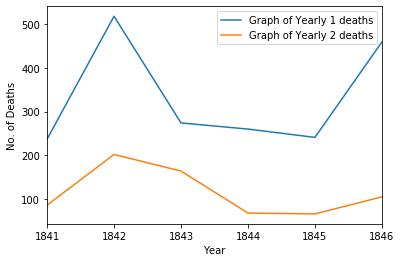

In [7]:
#To plot the yearly proportion of deaths for both clinics.
ax = yearly1.plot(x="year", y="deaths",
              label="Graph of Yearly 1 deaths")
yearly2.plot(x="year", y="deaths",
         label="Graph of Yearly 2 deaths",ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("No. of Deaths")


Task 4

In [8]:
monthly = pd.read_csv("datasets/monthly_deaths.csv",parse_dates=["date"])

In [9]:
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [10]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


Task 5

Text(0, 0.5, 'Proportion deaths')

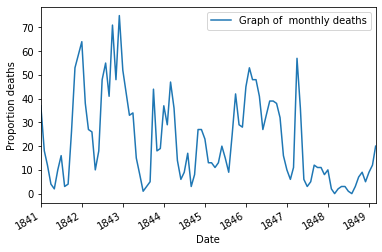

In [11]:
ax1 = monthly.plot(x="date", y="deaths",
              label="Graph of  monthly deaths")
ax1.set_xlabel("Date")
ax1.set_ylabel("Proportion deaths")

Task 6

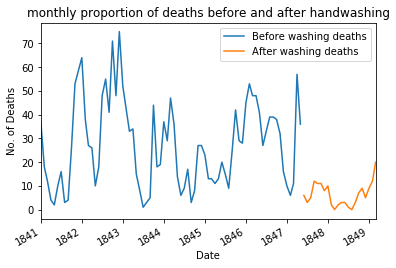

In [12]:
handwashing_start = pd.to_datetime('1847-06-01')
#To Split monthly into before_washing (the rows in monthly before handwashing_start) and after_washing (the rows in monthly at and after handwashing_start)
before_washing = monthly[monthly.date<'1847-06-01']
after_washing = monthly[monthly.date>='1847-06-01']
#To Plot proportion_deaths in before_washing and after_washing into the same plot. Use the DataFrame plot method.
ax = before_washing.plot(x="date", y="deaths",
              label="Before washing deaths")
after_washing.plot(x="date", y="deaths",
         label="After washing deaths",ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("No. of Deaths")
plt.title('monthly proportion of deaths before and after handwashing')
plt.legend()

Task 7

In [13]:
#To calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion
before_proportion = before_washing['deaths']
after_proportion = after_washing['deaths']
diff = np.mean(after_proportion) - np.mean(before_proportion)
diff

-20.650717703349283

Task 8

In [15]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(np.mean(boot_after)-np.mean(boot_before))

    confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -25.095754
0.975   -15.739892
dtype: float64

Task 9

In [17]:
doctors_should_wash_their_hands = True